In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Loading and Pre-Processing

In [2]:
df = pd.read_csv(".\\rsc\\student_data.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [3]:
# Separazione delle features dalla variabile target (assumendo che l'ultima colonna sia il target)
X = df.iloc[:, :-3]  # Features
y = df.iloc[:, -3:]   # Target

print(X.info())
print(y.info())

# Identificazione delle colonne numeriche e categoriche nelle features
X_numeric = X.select_dtypes(include=[np.number])
X_categorical = X.select_dtypes(include=['object'])
numeric_columns = X_numeric.columns.tolist()
categorical_columns = X_categorical.columns.tolist()

print(f"\nFeatures numeriche: {numeric_columns}")
print(f"Features categoriche: {categorical_columns}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
# NORMALIZZAZIONE DELLE VARIABILI NUMERICHE
scaler = StandardScaler()
X_numeric_scaled = pd.DataFrame(
    scaler.fit_transform(X_numeric),
    columns=X_numeric.columns,
    index=X_numeric.index
)

print("\nStatistiche delle variabili numeriche prima della normalizzazione:")
print(X_numeric.describe())
print("\nStatistiche delle variabili numeriche dopo la normalizzazione:")
print(X_numeric_scaled.describe())


Statistiche delle variabili numeriche prima della normalizzazione:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.10886

In [5]:
categorical_columns = X_categorical.columns
for col in categorical_columns:
    print(f"{col}: {X_categorical[col].nunique()} unique values")

school: 2 unique values
sex: 2 unique values
address: 2 unique values
famsize: 2 unique values
Pstatus: 2 unique values
Mjob: 5 unique values
Fjob: 5 unique values
reason: 4 unique values
guardian: 3 unique values
schoolsup: 2 unique values
famsup: 2 unique values
paid: 2 unique values
activities: 2 unique values
nursery: 2 unique values
higher: 2 unique values
internet: 2 unique values
romantic: 2 unique values


In [6]:
# CODIFICA DELLE VARIABILI CATEGORICHE
X_categorical_encoded = pd.DataFrame(index=X_categorical.index)

# One-Hot Encoding per variabili categoriche nominali
for col in X_categorical.columns:
    # Verifica se la variabile ha molte categorie (>2), usa Label Encoding
    # if X_categorical[col].nunique() > 2:
    le = LabelEncoder()
    X_categorical_encoded[col] = le.fit_transform(X_categorical[col])
    # else:
    #     # One-Hot Encoding per poche categorie
    #     dummies = pd.get_dummies(X_categorical[col], prefix=col, drop_first=True)
    #     X_categorical_encoded = pd.concat([X_categorical_encoded, dummies], axis=1)

print(X_categorical_encoded.info())
print(X_categorical_encoded.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   address     395 non-null    int64
 3   famsize     395 non-null    int64
 4   Pstatus     395 non-null    int64
 5   Mjob        395 non-null    int64
 6   Fjob        395 non-null    int64
 7   reason      395 non-null    int64
 8   guardian    395 non-null    int64
 9   schoolsup   395 non-null    int64
 10  famsup      395 non-null    int64
 11  paid        395 non-null    int64
 12  activities  395 non-null    int64
 13  nursery     395 non-null    int64
 14  higher      395 non-null    int64
 15  internet    395 non-null    int64
 16  romantic    395 non-null    int64
dtypes: int64(17)
memory usage: 52.6 KB
None
   school  sex  address  famsize  Pstatus  Mjob  Fjob  reason  guardian  \
0       0    0        1        0  

In [7]:
# Combinazione delle features numeriche normalizzate e categoriche codificate
X_processed = pd.concat([X_numeric_scaled, X_categorical_encoded], axis=1)

In [8]:
print("Analisi dei voti G1, G2, G3:")
print(f"G1: min={df['G1'].min()}, max={df['G1'].max()}")
print(f"G2: min={df['G2'].min()}, max={df['G2'].max()}")
print(f"G3: min={df['G3'].min()}, max={df['G3'].max()}")

Analisi dei voti G1, G2, G3:
G1: min=3, max=19
G2: min=0, max=19
G3: min=0, max=20


In [9]:
# Sostituisci la cella problematica con questa versione corretta
y_mean = y[['G1', 'G2', 'G3']].mean(axis=1)  # Calcola la media come Series
y = pd.cut(y_mean, bins=[0, 10, 20], labels=['Low', 'High'])  # Applica cut alla Series

print("Distribuzione delle classi:")
print(y.value_counts())
print(f"\nDistribuzione percentuale:")
print(y.value_counts(normalize=True).round(3))

Distribuzione delle classi:
High    216
Low     179
Name: count, dtype: int64

Distribuzione percentuale:
High    0.547
Low     0.453
Name: proportion, dtype: float64


# Clustering

Numero di componenti principali: 14


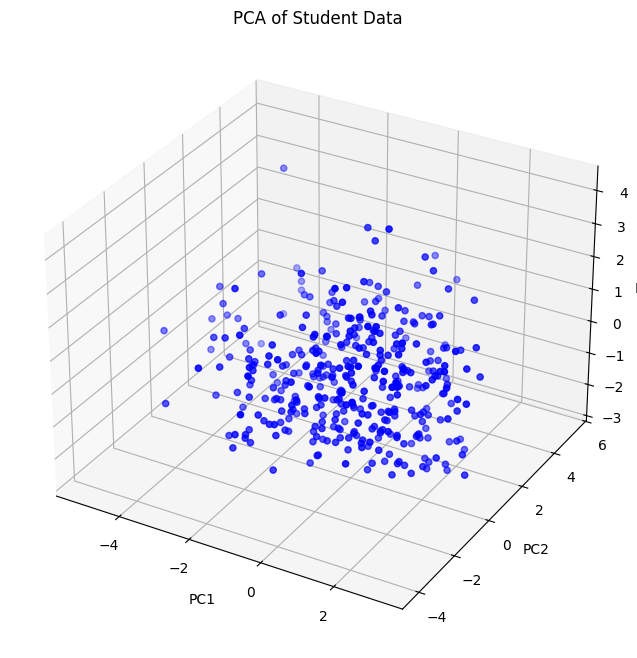

In [10]:
from sklearn.decomposition import PCA

N_components = 0.85

pca = PCA(n_components=N_components)
pca_data = pca.fit_transform(X_processed)

# numero di componenti principali
print(f"Numero di componenti principali: {pca.n_components_}")

# Visualizzazione dei dati PCA in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c='blue', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA of Student Data')
plt.show()

Silhouette score for 2 clusters: 0.10778971451430366 inertia: 5783.191845318192
Silhouette score for 3 clusters: 0.08467363656596101 inertia: 5409.278318106939
Silhouette score for 4 clusters: 0.09108830553637356 inertia: 5002.299945874474
Silhouette score for 5 clusters: 0.06783729446977033 inertia: 4883.172539625158
Silhouette score for 6 clusters: 0.08037537556171033 inertia: 4679.469584416919
Silhouette score for 7 clusters: 0.07063350421036466 inertia: 4524.730289761691
Silhouette score for 8 clusters: 0.061665478453425085 inertia: 4441.845045621265
Silhouette score for 9 clusters: 0.05820718138413302 inertia: 4385.273226204372
Silhouette score for 10 clusters: 0.05546851402580263 inertia: 4310.3080422891835
Silhouette score for 11 clusters: 0.0599834314173679 inertia: 4182.799073081164
Silhouette score for 12 clusters: 0.06278405804155235 inertia: 4107.753022709216
Silhouette score for 13 clusters: 0.06669330663773189 inertia: 4010.4760350940805
Silhouette score for 14 clusters: 

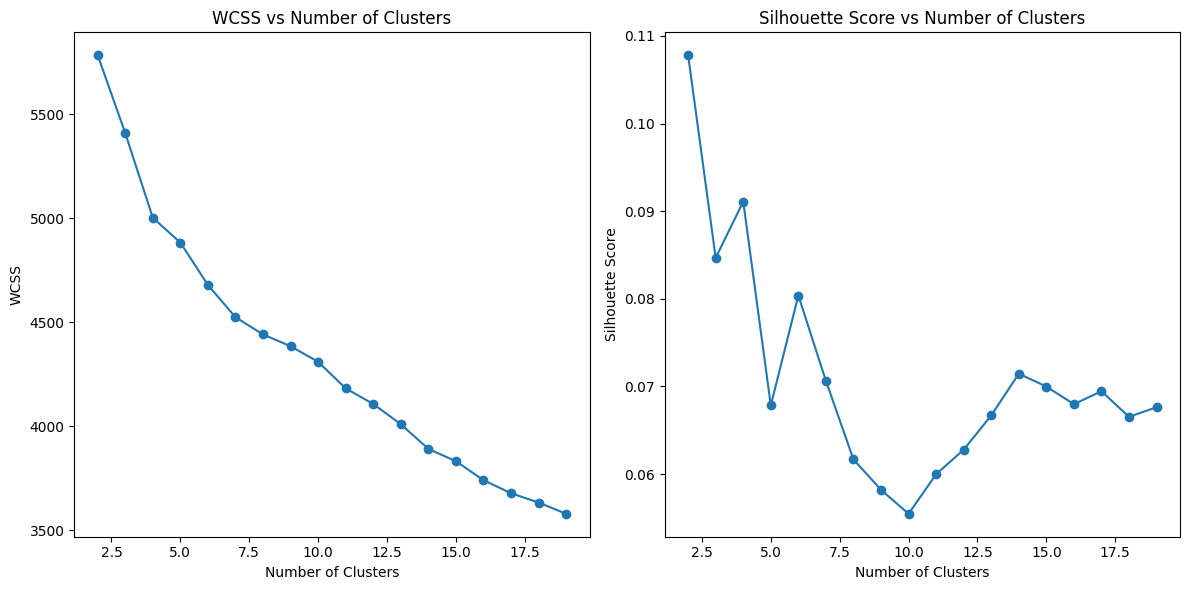

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data)
    silhouette_avg = silhouette_score(pca_data, kmeans.labels_)
    print(f"Silhouette score for {i} clusters: {silhouette_avg} inertia: {kmeans.inertia_}")
    wcss.append(kmeans.inertia_)

# plotting inetia e silhouette scores affiancati
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 20), wcss, marker='o')
plt.title('WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.subplot(1, 2, 2)
plt.plot(range(2, 20), [silhouette_score(pca_data, KMeans(n_clusters=i, random_state=42).fit(pca_data).labels_) for i in range(2, 20)], marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [12]:
# assegniamo le labels del kmeans al dataframe originale
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)
# pca_data['Cluster'] = cluster_labels

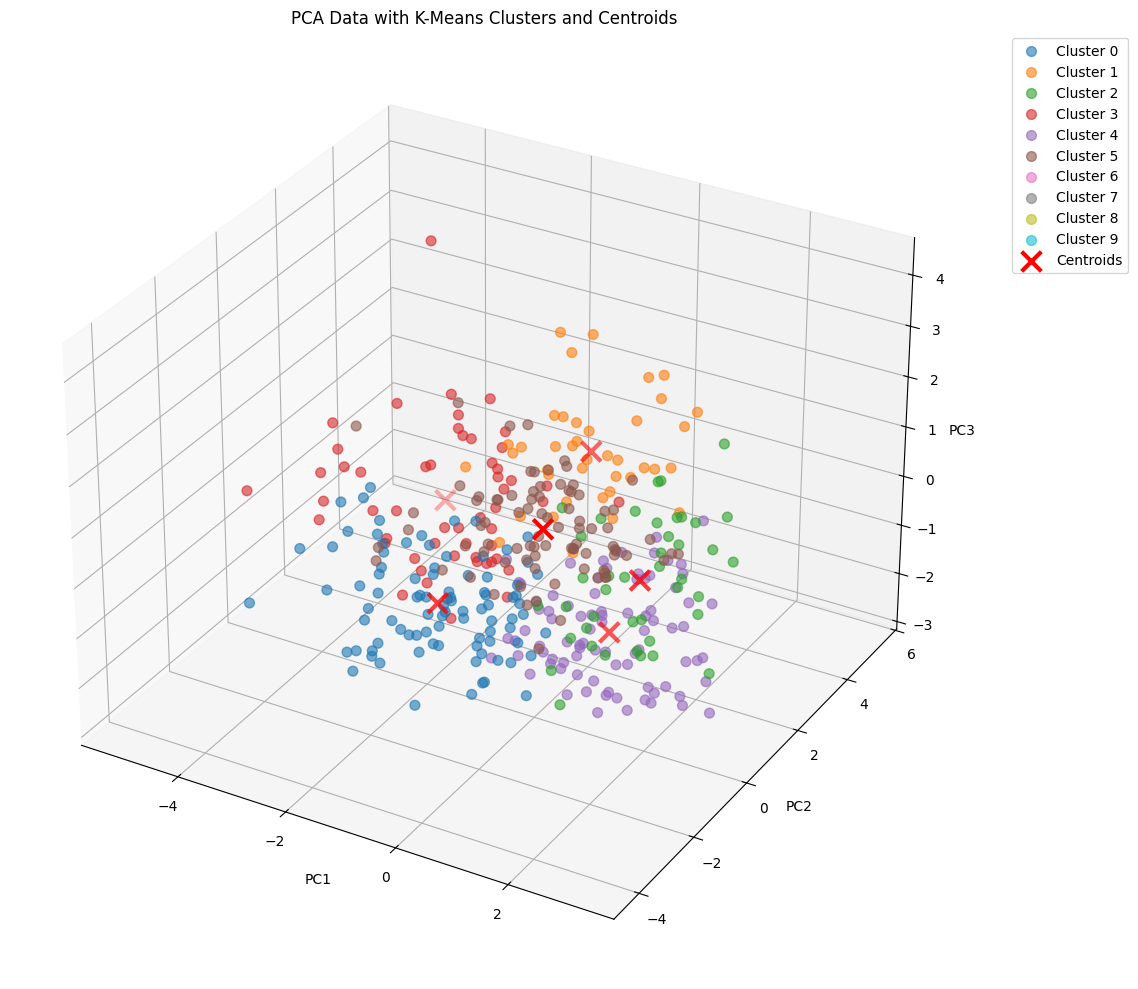

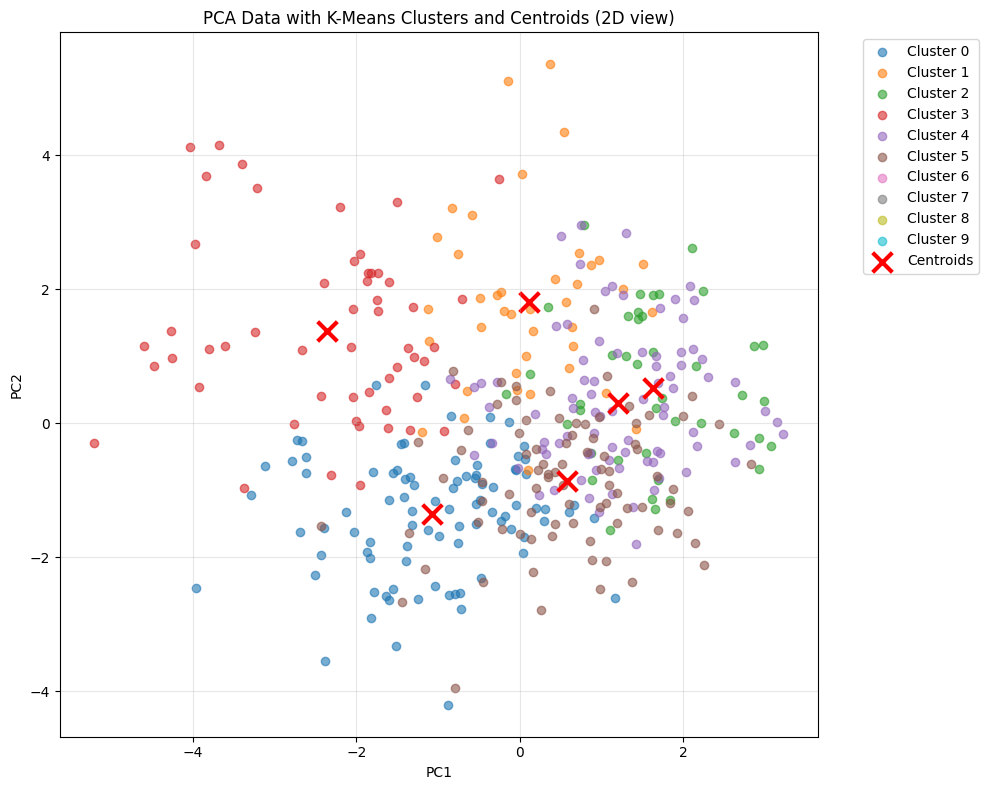

In [13]:
# Get centroids
centroids = kmeans.cluster_centers_

# Create the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a color map for clusters
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Plot each cluster with different colors
for i in range(10):
    cluster_mask = cluster_labels == i
    ax.scatter(pca_data[cluster_mask, 0], 
              pca_data[cluster_mask, 1], 
              pca_data[cluster_mask, 2], 
              c=[colors[i]], 
              label=f'Cluster {i}',
              alpha=0.6,
              s=50)

# Plot centroids
ax.scatter(centroids[:, 0], 
          centroids[:, 1], 
          centroids[:, 2], 
          c='red', 
          marker='x', 
          s=200, 
          linewidth=3,
          label='Centroids')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Data with K-Means Clusters and Centroids')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Also create a 2D version for better visibility
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

for i in range(10):
    cluster_mask = cluster_labels == i
    ax.scatter(pca_data[cluster_mask, 0], 
              pca_data[cluster_mask, 1], 
              c=[colors[i]], 
              label=f'Cluster {i}',
              alpha=0.6)

# Plot centroids in 2D
ax.scatter(centroids[:, 0], 
          centroids[:, 1], 
          c='red', 
          marker='x', 
          s=200, 
          linewidth=3,
          label='Centroids')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA Data with K-Means Clusters and Centroids (2D view)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ML Experiments

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

In [15]:
# Importa le librerie necessarie per i modelli
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# DECISION TREE - Grid Search per ottimizzazione iperparametri
print("=== DECISION TREE - GRID SEARCH ===")

# Definisci i parametri da testare
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# Inizializza il modello
dt = DecisionTreeClassifier(random_state=42)

# Grid Search con cross-validation
dt_grid_search = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    cv=5,  # 5-fold cross validation
    scoring='f1_weighted',
    n_jobs=-1,  # Usa tutti i core disponibili
    verbose=1
)

# Allena il modello con grid search
print("Inizio Grid Search per Decision Tree...")
dt_grid_search.fit(X_train, y_train)

# Migliori parametri
print(f"\nMigliori parametri Decision Tree:")
print(dt_grid_search.best_params_)
print(f"Miglior score CV: {dt_grid_search.best_score_:.4f}")

# Modello ottimizzato
best_dt = dt_grid_search.best_estimator_

# Verifica esplicita: ri-allena il modello migliore su tutto il training set
print("Ri-allenamento del modello migliore su tutto il training set...")
best_dt.fit(X_train, y_train)

=== DECISION TREE - GRID SEARCH ===
Inizio Grid Search per Decision Tree...
Fitting 5 folds for each of 480 candidates, totalling 2400 fits

Migliori parametri Decision Tree:
{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Miglior score CV: 0.6519
Ri-allenamento del modello migliore su tutto il training set...


DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=2, random_state=42)

In [17]:
# RANDOM FOREST - Grid Search per ottimizzazione iperparametri
print("\n=== RANDOM FOREST - GRID SEARCH ===")

# Definisci i parametri da testare (più conservativi per velocità)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Inizializza il modello
rf = RandomForestClassifier(random_state=42)

# Grid Search con cross-validation
rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Allena il modello con grid search
print("Inizio Grid Search per Random Forest...")
rf_grid_search.fit(X_train, y_train)

# Migliori parametri
print(f"\nMigliori parametri Random Forest:")
print(rf_grid_search.best_params_)
print(f"Miglior score CV: {rf_grid_search.best_score_:.4f}")

# Modello ottimizzato
best_rf = rf_grid_search.best_estimator_

print("\nRi-allenamento del modello migliore su tutto il training set...")
best_rf.fit(X_train, y_train)


=== RANDOM FOREST - GRID SEARCH ===
Inizio Grid Search per Random Forest...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

Migliori parametri Random Forest:
{'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Miglior score CV: 0.6898

Ri-allenamento del modello migliore su tutto il training set...


RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_samples_split=10, n_estimators=200, random_state=42)

In [18]:
# VALUTAZIONE DEI MODELLI OTTIMIZZATI
print("\n=== VALUTAZIONE MODELLI ===")

# Predizioni sui set di test
dt_predictions = best_dt.predict(X_test)
rf_predictions = best_rf.predict(X_test)

# Accuratezza
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Decision Tree - Accuratezza test: {dt_accuracy:.4f}")
print(f"Random Forest - Accuratezza test: {rf_accuracy:.4f}")

# Classification Report dettagliato
print(f"\n--- Decision Tree Classification Report ---")
print(classification_report(y_test, dt_predictions))

print(f"\n--- Random Forest Classification Report ---")
print(classification_report(y_test, rf_predictions))


=== VALUTAZIONE MODELLI ===
Decision Tree - Accuratezza test: 0.7215
Random Forest - Accuratezza test: 0.6582

--- Decision Tree Classification Report ---
              precision    recall  f1-score   support

        High       0.70      0.83      0.76        42
         Low       0.76      0.59      0.67        37

    accuracy                           0.72        79
   macro avg       0.73      0.71      0.71        79
weighted avg       0.73      0.72      0.72        79


--- Random Forest Classification Report ---
              precision    recall  f1-score   support

        High       0.64      0.83      0.72        42
         Low       0.71      0.46      0.56        37

    accuracy                           0.66        79
   macro avg       0.67      0.65      0.64        79
weighted avg       0.67      0.66      0.64        79



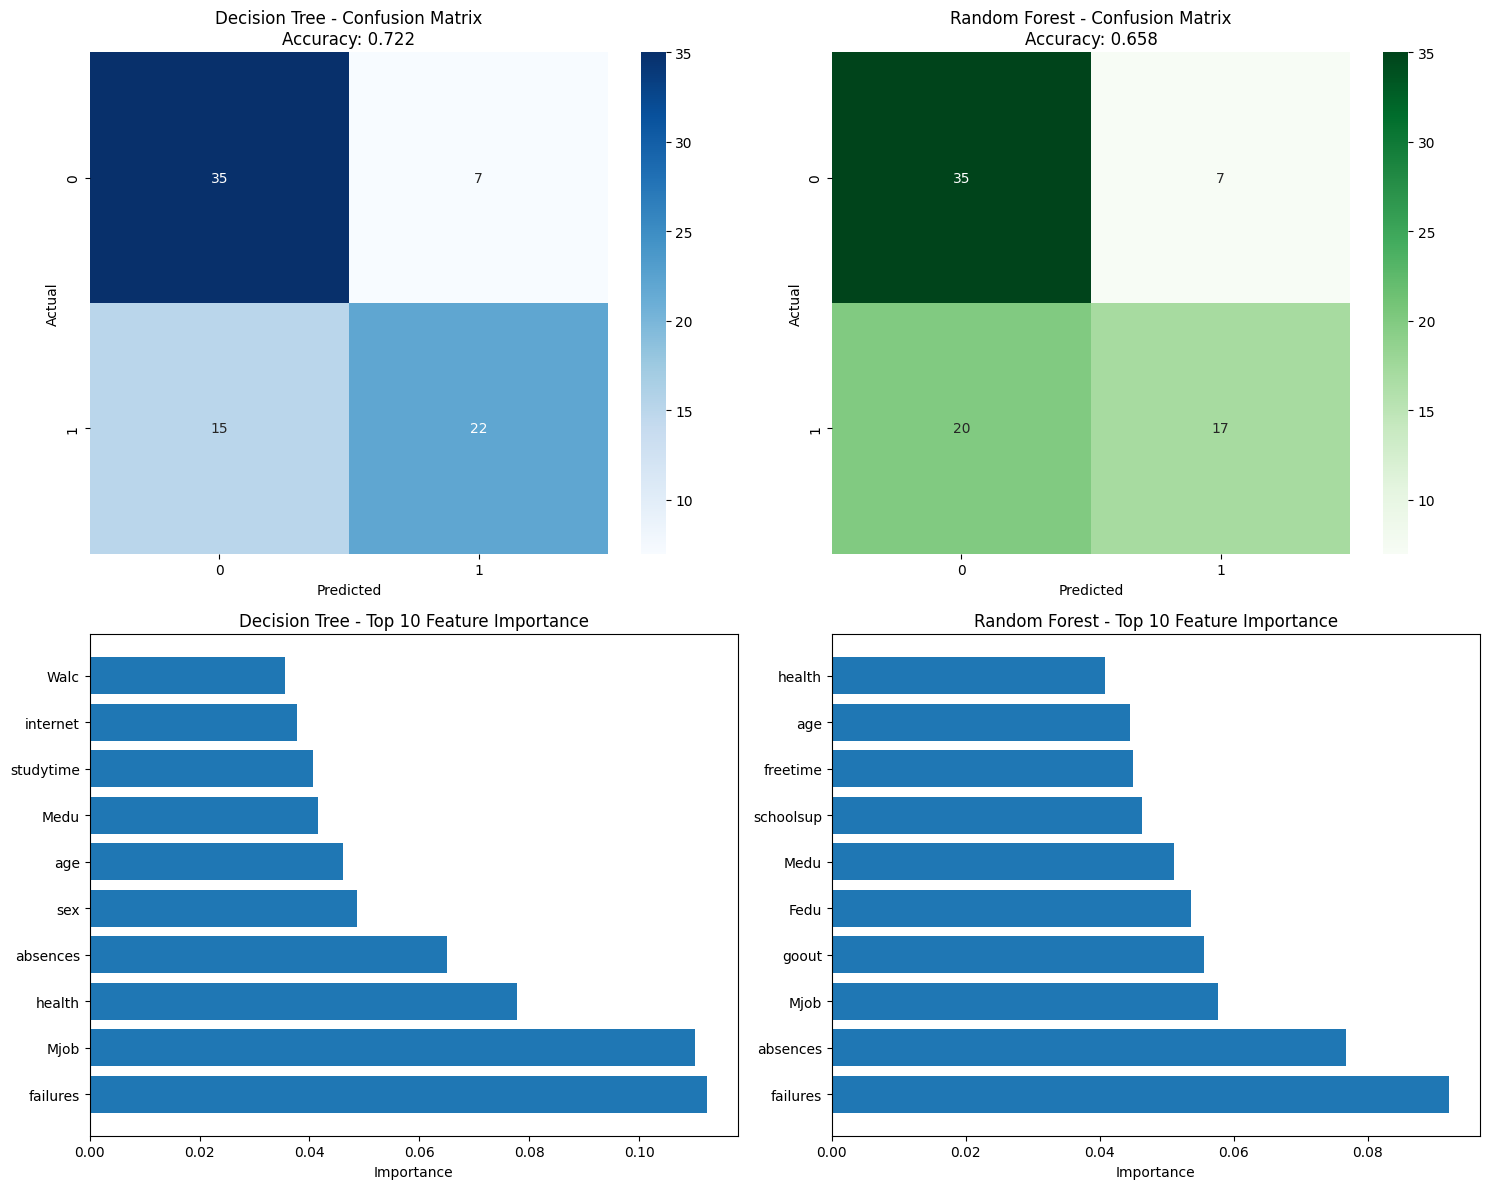

In [19]:
# VISUALIZZAZIONE DELLE PERFORMANCE
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Confusion Matrix Decision Tree
cm_dt = confusion_matrix(y_test, dt_predictions)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title(f'Decision Tree - Confusion Matrix\nAccuracy: {dt_accuracy:.3f}')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[0,1])
axes[0,1].set_title(f'Random Forest - Confusion Matrix\nAccuracy: {rf_accuracy:.3f}')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

# Feature Importance - Decision Tree
if hasattr(best_dt, 'feature_importances_'):
    dt_importance = pd.DataFrame({
        'feature': X_processed.columns,
        'importance': best_dt.feature_importances_
    }).sort_values('importance', ascending=False).head(10)
    
    axes[1,0].barh(dt_importance['feature'], dt_importance['importance'])
    axes[1,0].set_title('Decision Tree - Top 10 Feature Importance')
    axes[1,0].set_xlabel('Importance')

# Feature Importance - Random Forest
if hasattr(best_rf, 'feature_importances_'):
    rf_importance = pd.DataFrame({
        'feature': X_processed.columns,
        'importance': best_rf.feature_importances_
    }).sort_values('importance', ascending=False).head(10)
    
    axes[1,1].barh(rf_importance['feature'], rf_importance['importance'])
    axes[1,1].set_title('Random Forest - Top 10 Feature Importance')
    axes[1,1].set_xlabel('Importance')

plt.tight_layout()
plt.show()